In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
Vacancy_Rates19 = 'Quarterly Rental Vacancy Rates 1900s.csv'
Vacancy_Rates20 = 'Quarterly Rental Vacancy Rates 2000s.csv'
Interest_Rates = 'fed funds rate historical data.csv'

In [4]:
vacancy19 = pd.read_csv(Vacancy_Rates19)
vacancy19.head()

,DATE,Vacancy Rate
0,1/1/56,6.2
1,4/1/56,5.9
2,7/1/56,6.3
3,10/1/56,5.8
4,1/1/57,5.3


In [5]:
vacancy19.dtypes

DATE             object
Vacancy Rate    float64
dtype: object

In [6]:
years = []
for date in vacancy19['DATE']:
    split_date = date.split('/')
    year = '19' + str(split_date[2])
    years.append(int(year))

vacancy19['Year'] = years
vacancy19.head()

,DATE,Vacancy Rate,Year
0,1/1/56,6.2,1956
1,4/1/56,5.9,1956
2,7/1/56,6.3,1956
3,10/1/56,5.8,1956
4,1/1/57,5.3,1957


In [7]:
vacancy20 = pd.read_csv(Vacancy_Rates20)

years = []
for date in vacancy20['DATE']:
    split_date = date.split('/')
    year = '20' + str(split_date[2])
    years.append(int(year))

vacancy20['Year'] = years
vacancy20.head()

,DATE,Vacancy Rate,Year
0,1/1/00,7.9,2000
1,4/1/00,8.0,2000
2,7/1/00,8.2,2000
3,10/1/00,7.8,2000
4,1/1/01,8.2,2001


In [8]:
merged_vacancy = pd.concat([vacancy19,vacancy20])
merged_vacancy.head(5)

,DATE,Vacancy Rate,Year
0,1/1/56,6.2,1956
1,4/1/56,5.9,1956
2,7/1/56,6.3,1956
3,10/1/56,5.8,1956
4,1/1/57,5.3,1957


In [15]:
#Store the Average Vacancy Rate Data Grouped by Year
#avg_yearly_vacancy = merged_vacancy.groupby('Year')
#df.resample('D').mean()
#avg_yearly_vacancy.resample('A').mean()

avg_yearly_vacancy = merged_vacancy.groupby('Year').agg({'Vacancy Rate': ['mean']})


# Convert to DataFrame
avg_yearly_vacancy = pd.DataFrame(avg_yearly_vacancy)


# Flatten the column headings
avg_yearly_vacancy = avg_yearly_vacancy.reset_index()

# Preview DataFrame
avg_yearly_vacancy.head()

,Year,Vacancy Rate
,,mean
0,1956,6.050
1,1957,5.525
2,1958,6.425
3,1959,7.075
4,1960,8.175


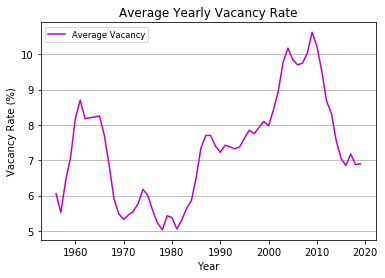

In [10]:
#Plot the Average Yearly Vacancy rate (line graph) 

plt.plot(avg_yearly_vacancy["Year"], avg_yearly_vacancy["Vacancy Rate"], color="m", linestyle="-", linewidth=1.50)

plt.title("Average Yearly Vacancy Rate")
plt.ylabel("Vacancy Rate (%)")
plt.xlabel("Year")
plt.grid(axis='y')
plt.legend(['Average Vacancy'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("vacancy.png")

# Show the Figure
plt.show()

In [17]:
interest = pd.read_csv(Interest_Rates)
interest.head()

,date,year,interest rate
0,7/1/54,1954,1.13
1,7/2/54,1954,1.25
2,7/3/54,1954,1.25
3,7/4/54,1954,1.25
4,7/5/54,1954,0.88


In [21]:
#Store the Average Interest Rate Grouped by Year 
avg_yearly_interest = interest.groupby('year').agg({'interest rate': ['mean']})

# Convert to DataFrame
avg_yearly_interest = pd.DataFrame(avg_yearly_interest)

# Flatten the column headings
avg_yearly_interest = avg_yearly_interest.reset_index()

# Preview DataFrame
avg_yearly_interest.head()

,year,interest rate
,,mean
0,1954,1.006066
1,1955,1.785699
2,1956,2.728224
3,1957,3.105342
4,1958,1.574055


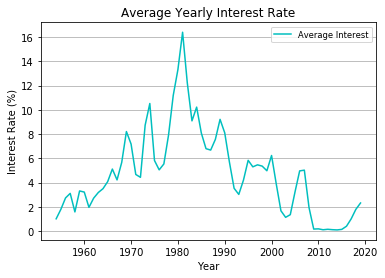

In [24]:
#Plot the Average Yearly Interest rate (line graph) 

plt.plot(avg_yearly_interest["year"], avg_yearly_interest["interest rate"], color="c", linestyle="-", linewidth=1.50)

plt.title("Average Yearly Interest Rate")
plt.ylabel("Interest Rate (%)")
plt.xlabel("Year")
plt.grid(axis='y')
plt.legend(['Average Interest'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("interest.png")

# Show the Figure
plt.show()

In [1]:
# Attom API 
import requests
import json
from config import api_key


URL = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/snapshot?startSaleSearchDate=2018/05/01&endSaleSearchDate=2019/10/31&cityname=Denver"
    
headers = {
    "accept": "application/json", 
    "apikey": api_key
}

R = requests.get(URL, headers = headers) 
R.json()


{'status': {'version': '1.0.0',
  'code': 0,
  'msg': 'SuccessWithResult',
  'total': 10000,
  'page': 1,
  'pagesize': 10},
 'property': [{'identifier': {'obPropId': 18432962208031,
    'fips': '08031',
    'apn': '0634104006006',
    'apnOrig': '634104006006',
    'attomId': 184329622},
   'lot': {'lotSize1': 0.1233},
   'address': {'country': 'US',
    'countrySubd': 'CO',
    'line1': '2770 S ELMIRA ST UNIT 11',
    'line2': 'DENVER, CO 80231',
    'locality': 'Denver',
    'matchCode': 'ExaStr',
    'oneLine': '2770 S ELMIRA ST UNIT 11, DENVER, CO 80231',
    'postal1': '80231',
    'postal2': '3919',
    'postal3': 'C003'},
   'location': {'accuracy': 'Street',
    'elevation': 0.0,
    'latitude': '39.665018',
    'longitude': '-104.873092',
    'distance': 0.0,
    'geoid': 'CO08031, CS0891007, DB0803360, MT30001324, ND0000251343, PL0820000, RS0001796382, SB0000076136, SB0000076139, SB0000076169, SB0000135821, ZI80231'},
   'summary': {'propclass': 'Condominium (residential)',


In [2]:
denver_data = []

for prop in R.json()["property"]:
        denver_data.append(prop["sale"]["amount"]["saleamt"])

denver_data


[0, 0, 0, 0, 0, 0, 0, 0, 0, 89000]

In [44]:
# create df with 'average value', 'year', 'zip code'
# zip codes could be all of Denver and surrounding counties

# Another dataset: 
## all of the properties that have an assessed total value within this range that are within Denver ZIP Codes
### https://api.gateway.attomdata.com/propertyapi/v1.0.0/assessment/detail?postalcode=11215&minAssdTtlValue=1000000&maxAssdTtlValue=2500000




In [ ]:
#Store the average home value each year 
home_value_mean = merged_datasets(["Year"]).mean()["Home Value"]




In [ ]:
#Visualize the data
# Create a line graph that displays the avg_yearly_vacancy dataframe, 
# the avg_yearly_interest dataframe, and the average home value 

plt.title('Denver Real Estate Market Trends')

plt.plot(combined.Year[::3])
plt.plot(avg_yearly_vacancy.['Vacancy Rate'])
plt.plot(avg_yearly_interest.['Federal Interest Rate'])
plt.plot(combined.['Home Values'])

plt.legend()

plt.figure(figsize=(8,5))

plt.show()